# Introduction
This code tests our work on Breast Cancer Wisconsin (Diagnostic) Data Set (WDBCD) (https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

In [1]:
# Uninstall current TF version and install compatible version with tfmot
!pip uninstall -y tensorflow
!pip install tensorflow==2.13.0
!pip install tensorflow-model-optimization==0.7.5

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.2/524.2 MB 3.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 41.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 73.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 98.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 24.4 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.14.0
    Uninstalling typing_extensions-4.14.0:
      Successfully uninstalled typing_extensions-4.14.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

#import os
#print(os.listdir("../input"))
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

%matplotlib inline 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPool1D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils

#import tensorflow_model_optimization as tfmot




#Import models from scikit learn module:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

#Measuring Time
import time


# Parameters

In [3]:
epoch=50

# Loading Dataset

In [4]:
#load dataset
#data = pd.read_csv("/kaggle/input/wdbc-kd-data/data.csv",header = 0) 
data = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv",header = 0) 
print(type(data))
data.head(5)

<class 'pandas.core.frame.DataFrame'>


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Data Preprocessing
## Get classes

In [5]:
Y=data.diagnosis

print(Y.value_counts())
Y.head(5)

diagnosis
B    357
M    212
Name: count, dtype: int64


0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

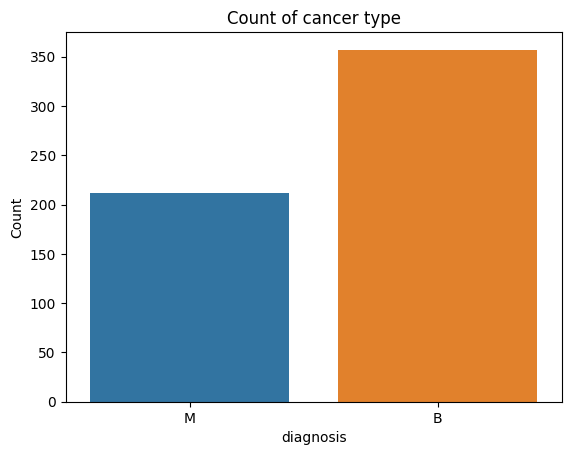

In [6]:
plt.title('Count of cancer type')
sns.countplot(x="diagnosis",data=data)
plt.ylabel('Count')
plt.show()

## Prepare and clean the dataset

In [7]:
data.isnull().any().describe()

count        33
unique        2
top       False
freq         32
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Remove unwanted info

In [9]:
# drop id and unnamed 32 colums from the features
# we still need diagnosis for further statistics, 
# it will be dropped later

data.drop(['id','Unnamed: 32'],axis=1,inplace=True)
data.info(),

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

(None,)

In [10]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Analyse usable data

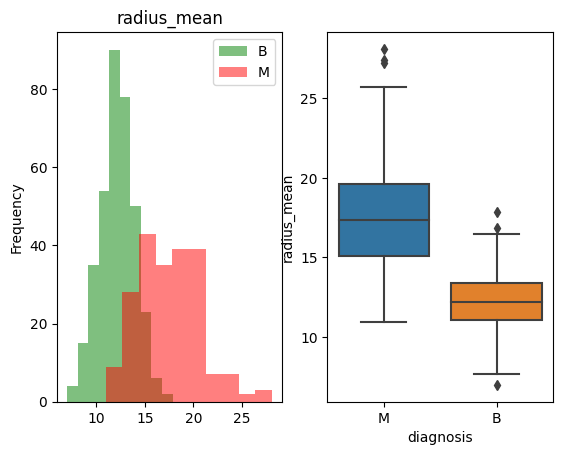

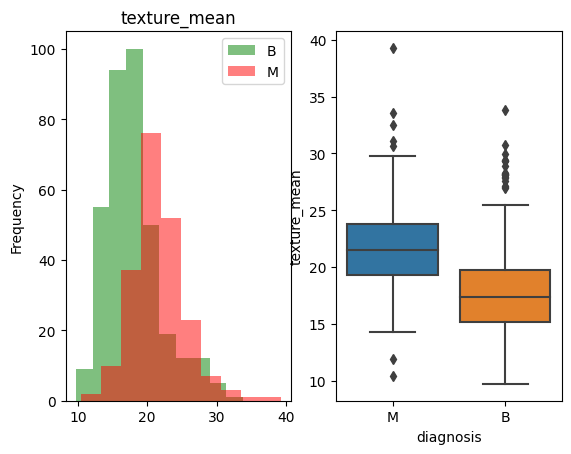

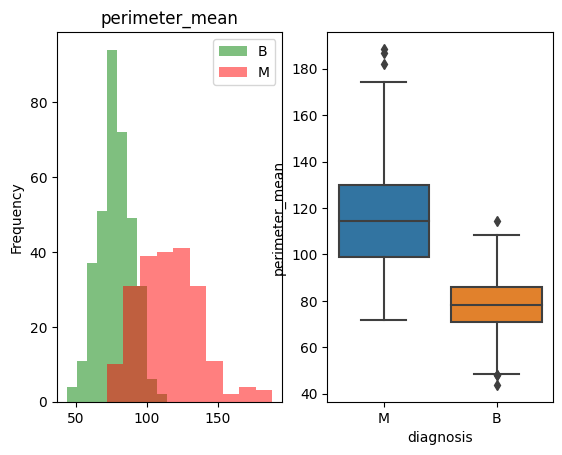

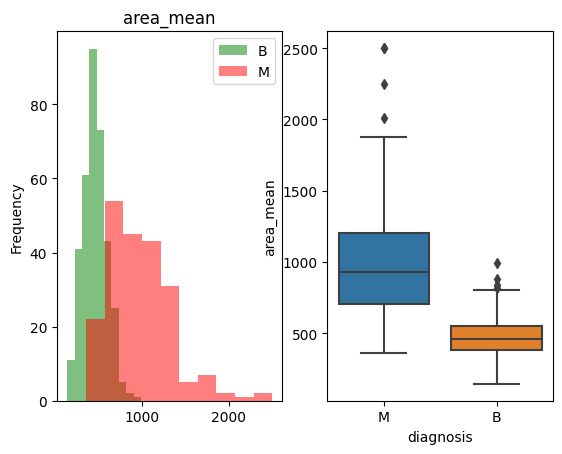

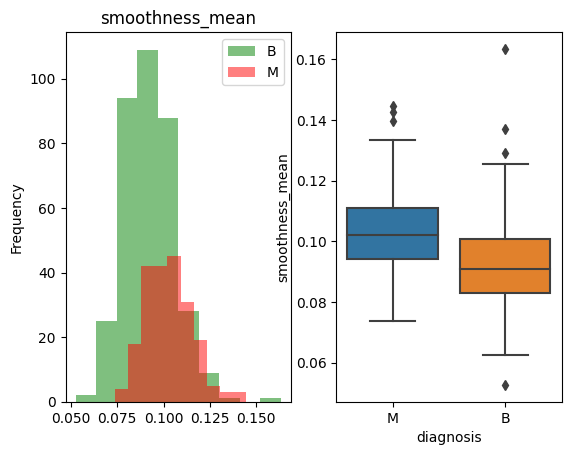

In [11]:
for i in (data.columns[1:6]):
    plt.subplot(1,2,1)
    data[i][data['diagnosis']=='B'].plot.hist(alpha=0.5,title=i,color='green')
    data[i][data['diagnosis']=='M'].plot.hist(alpha=0.5,color='red')
    plt.legend(['B','M'],loc='upper right')
    #plt.grid(visible=True)
    
    
    plt.subplot(1,2,2)
    sns.boxplot(x="diagnosis", y=i, data=data)
    plt.show()

## Observations*
1. Mean values of cell like radius, perimeter, area, compactness, concavity,concave points etc can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.
2. Mean values of column like texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other. In any of the histograms there are no noticeable large outliers that warrants further cleanup.

## Remove input from data

In [12]:
#Diagnosis is in index 0, 
#so we start copying from index 1
#see, I told you we will drop it ;-)

data.drop('diagnosis',axis=1,inplace=True)
data.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Correlation matrix

In [13]:
# Create correlation matrix
data.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


Text(0.5, 1.0, 'Correlation between different fearures')

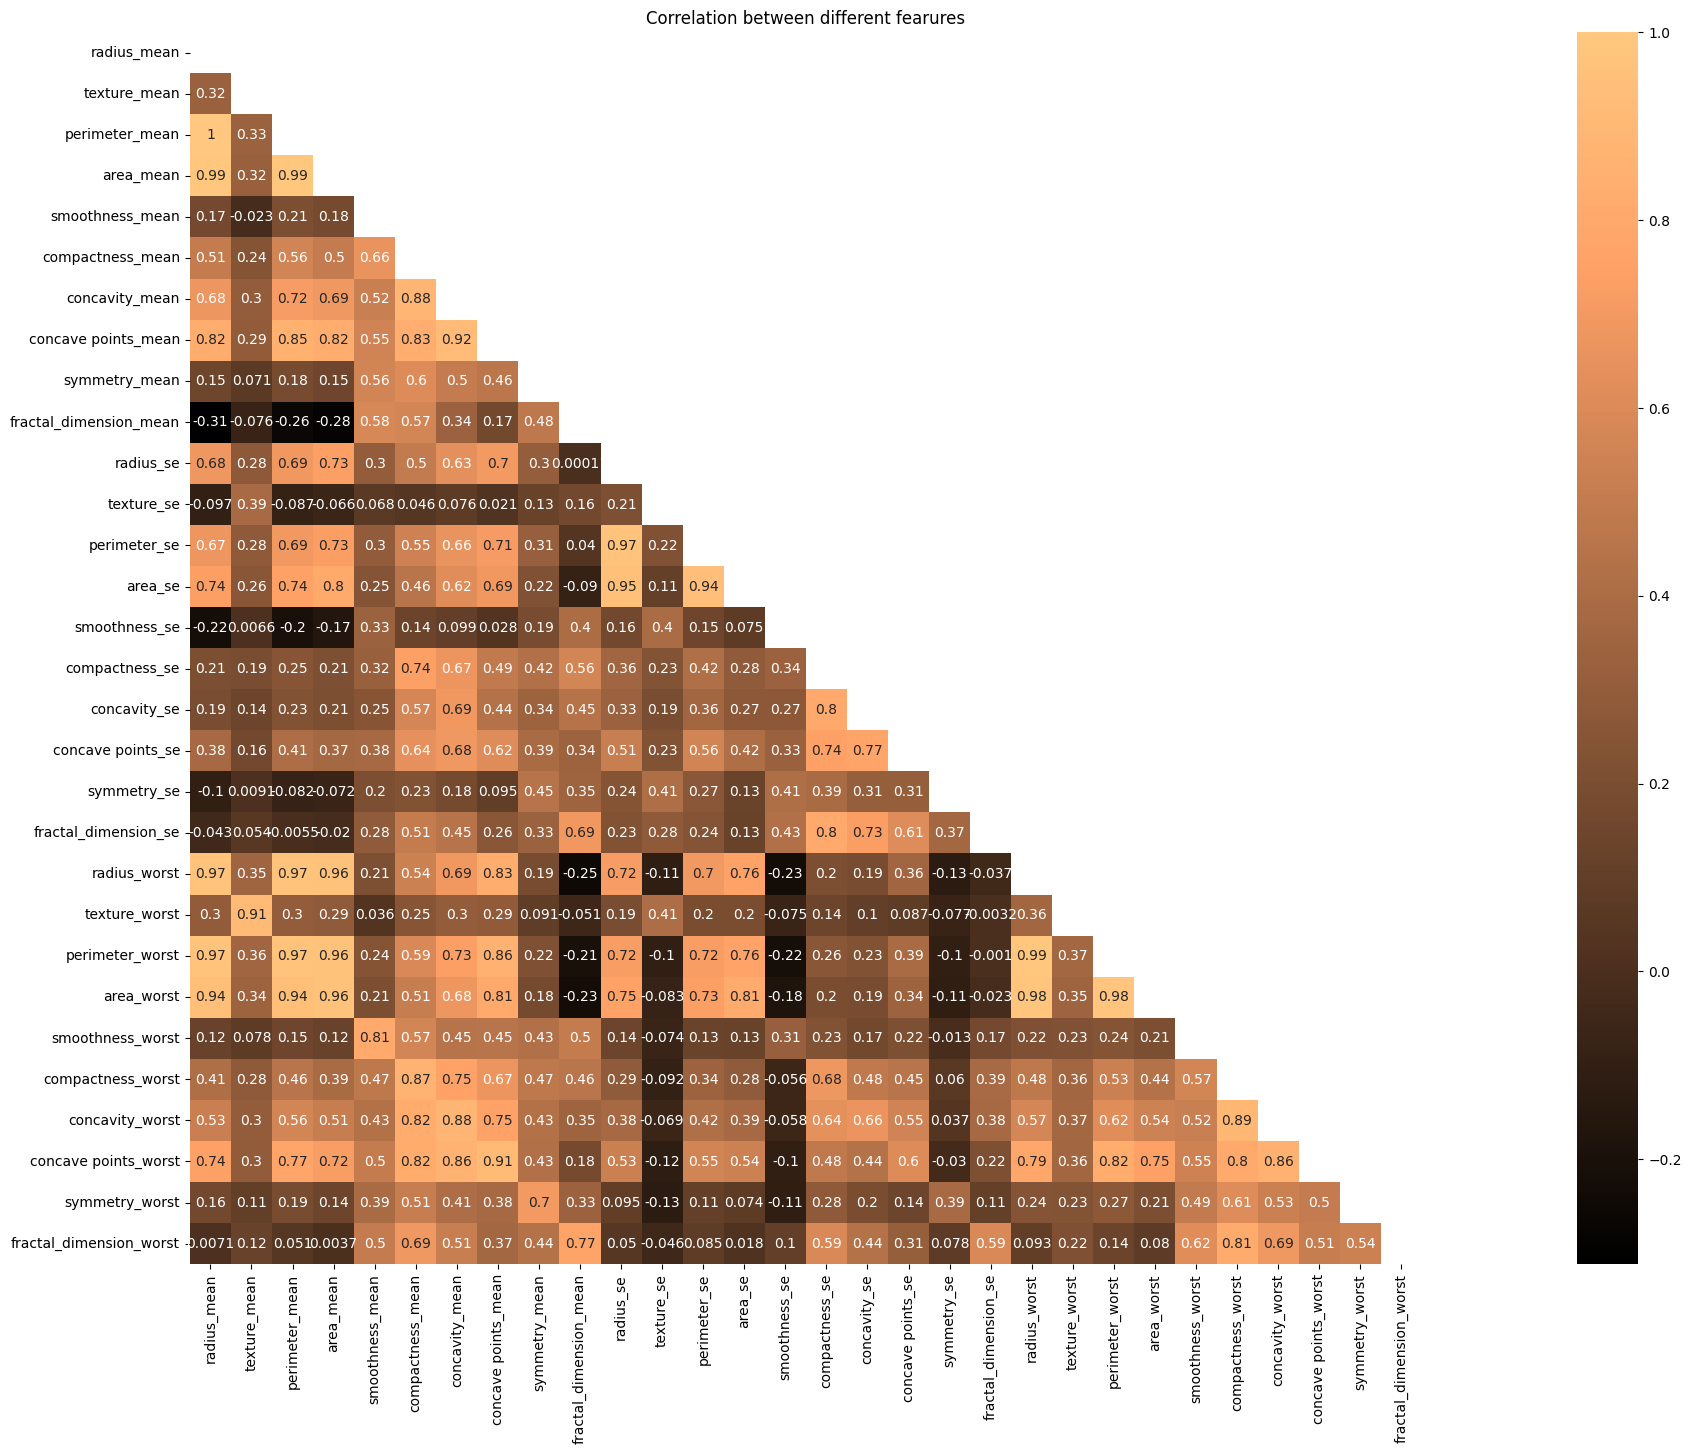

In [14]:
correlation=data.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(correlation)
plt.figure(figsize=(40,16))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='copper',mask=matrix)
plt.title('Correlation between different fearures')
#plt.savefig("cor.svg")

In [15]:
type(data)

pandas.core.frame.DataFrame

## Get the input (X)

In [16]:
#Copying data to X for bravity
X=data

#for emulating user
temp=pd.DataFrame(data=[data.values.tolist()[0]],columns=data.columns.values.tolist())
del data

#Verify :-D
print(type(X))
X.head(5)

<class 'pandas.core.frame.DataFrame'>


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## PCA

In [17]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[ 1.16014257e+03, -2.93917544e+02,  4.85783976e+01, ...,
         1.29334919e-03,  1.98910417e-03,  7.04378359e-04],
       [ 1.26912244e+03,  1.56301818e+01, -3.53945342e+01, ...,
        -1.34685217e-03,  6.85925212e-04, -1.06125086e-03],
       [ 9.95793889e+02,  3.91567432e+01, -1.70975298e+00, ...,
         1.84867758e-05, -7.75218581e-04,  4.05360270e-04],
       ...,
       [ 3.14501756e+02,  4.75535252e+01, -1.04424072e+01, ...,
         2.54369638e-05,  4.83858890e-04, -2.85342703e-04],
       [ 1.12485812e+03,  3.41292250e+01, -1.97420874e+01, ...,
         1.23547951e-03, -8.08728730e-04,  1.21655195e-03],
       [-7.71527622e+02, -8.86431064e+01,  2.38890319e+01, ...,
        -4.44552928e-03,  2.42876427e-04,  1.46800350e-03]])

In [18]:
pca.get_covariance()

array([[ 1.24189201e+01,  4.90758156e+00,  8.54471417e+01,
         1.22448341e+03,  8.45445983e-03,  9.41970568e-02,
         1.90127582e-01,  1.12475116e-01,  1.42731729e-02,
        -7.75370629e-03,  6.63650325e-01, -1.89188600e-01,
         4.80354973e+00,  1.17968162e+02, -2.35533633e-03,
         1.30005142e-02,  2.06588280e-02,  8.17956306e-03,
        -3.03898170e-03, -3.97624858e-04,  1.65137495e+01,
         6.43310002e+00,  1.14288570e+02,  1.88822722e+03,
         9.62462515e-03,  2.29249204e-01,  3.87386440e-01,
         1.72392739e-01,  3.57457580e-02,  4.49735060e-04],
       [ 4.90758156e+00,  1.84989087e+01,  3.44397592e+01,
         4.85993787e+02, -1.41477877e-03,  5.37668058e-02,
         1.03692344e-01,  4.89769268e-02,  8.41887566e-03,
        -2.32115824e-03,  3.29037393e-01,  9.16695072e-01,
         2.44944877e+00,  5.08408652e+01,  8.54099045e-05,
         1.47865987e-02,  1.86039300e-02,  4.34837964e-03,
         3.24506954e-04,  6.19772637e-04,  7.32926700e+

In [19]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([9.82044672e-01, 1.61764899e-02, 1.55751075e-03, 1.20931964e-04,
       8.82724536e-05, 6.64883951e-06, 4.01713682e-06, 8.22017197e-07,
       3.44135279e-07, 1.86018721e-07, 6.99473205e-08, 1.65908880e-08,
       6.99641650e-09, 4.78318306e-09, 2.93549214e-09, 1.41684927e-09,
       8.29577731e-10, 5.20405883e-10, 4.08463983e-10, 3.63313378e-10,
       1.72849737e-10, 1.27487508e-10, 7.72682973e-11, 6.28357718e-11,
       3.57302295e-11, 2.76396041e-11, 8.14452259e-12, 6.30211541e-12,
       4.43666945e-12, 1.55344680e-12])

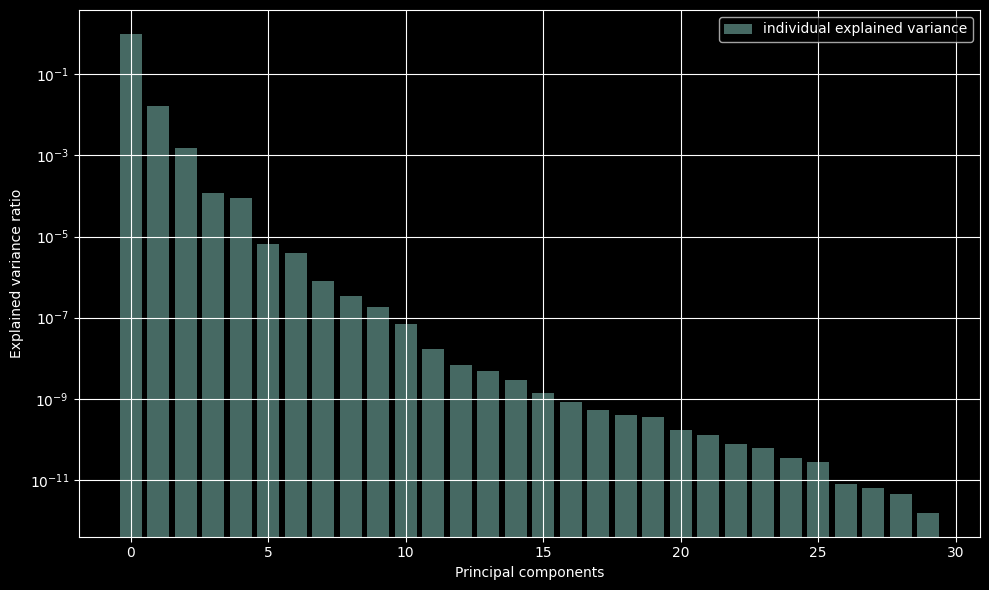

In [20]:
# We used logarithmic scale in the y-axis becaus the first value is so high

with plt.style.context('dark_background'):
    fig=plt.figure(figsize=(10, 6))
    ax = fig.add_subplot()

    ax.bar(range(30), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    ax.set_yscale('log')
    
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.grid(visible=True)
    plt.tight_layout()

Thus we can see from the above plot that first three components constitute almost 73% of the variance. Fourth to twenty sixth components has 25% of the data sprad.The remaining component has less than 0.001% of the variance.Hence we can drop from 27 to 30th component(total of 4 features)



In [21]:
pca=PCA(n_components=26)
X_new=pca.fit_transform(X)
X_new

array([[ 1.16014257e+03, -2.93917544e+02,  4.85783976e+01, ...,
         1.15600264e-02,  5.77287322e-03,  1.37696164e-03],
       [ 1.26912244e+03,  1.56301818e+01, -3.53945342e+01, ...,
         6.96754281e-03, -6.97814727e-03,  1.41102647e-03],
       [ 9.95793889e+02,  3.91567432e+01, -1.70975298e+00, ...,
        -4.00723197e-03,  7.09320402e-04, -3.78086998e-03],
       ...,
       [ 3.14501756e+02,  4.75535252e+01, -1.04424072e+01, ...,
        -3.92718961e-03, -9.20501512e-04,  5.73214324e-04],
       [ 1.12485812e+03,  3.41292250e+01, -1.97420874e+01, ...,
         1.12694062e-03, -2.64574418e-03,  1.86150989e-03],
       [-7.71527622e+02, -8.86431064e+01,  2.38890319e+01, ...,
         1.15292833e-02,  1.27452776e-02,  3.53933403e-03]])

In [22]:
pca.get_covariance()

array([[ 1.24189201e+01,  4.90758156e+00,  8.54471417e+01,
         1.22448341e+03,  8.45445990e-03,  9.41970568e-02,
         1.90127582e-01,  1.12475116e-01,  1.42731729e-02,
        -7.75370607e-03,  6.63650325e-01, -1.89188600e-01,
         4.80354973e+00,  1.17968162e+02, -2.35533492e-03,
         1.30005136e-02,  2.06588275e-02,  8.17956694e-03,
        -3.03898194e-03, -3.97623863e-04,  1.65137495e+01,
         6.43310002e+00,  1.14288570e+02,  1.88822722e+03,
         9.62462491e-03,  2.29249204e-01,  3.87386440e-01,
         1.72392738e-01,  3.57457581e-02,  4.49734957e-04],
       [ 4.90758156e+00,  1.84989087e+01,  3.44397592e+01,
         4.85993787e+02, -1.41477877e-03,  5.37668058e-02,
         1.03692344e-01,  4.89769268e-02,  8.41887565e-03,
        -2.32115828e-03,  3.29037393e-01,  9.16695072e-01,
         2.44944877e+00,  5.08408652e+01,  8.54099700e-05,
         1.47865986e-02,  1.86039300e-02,  4.34837991e-03,
         3.24506944e-04,  6.19772640e-04,  7.32926700e+

In [23]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([9.82044672e-01, 1.61764899e-02, 1.55751075e-03, 1.20931964e-04,
       8.82724536e-05, 6.64883951e-06, 4.01713682e-06, 8.22017197e-07,
       3.44135279e-07, 1.86018721e-07, 6.99473205e-08, 1.65908880e-08,
       6.99641650e-09, 4.78318306e-09, 2.93549214e-09, 1.41684927e-09,
       8.29577731e-10, 5.20405883e-10, 4.08463983e-10, 3.63313378e-10,
       1.72849737e-10, 1.27487508e-10, 7.72682973e-11, 6.28357718e-11,
       3.57302295e-11, 2.76396041e-11])

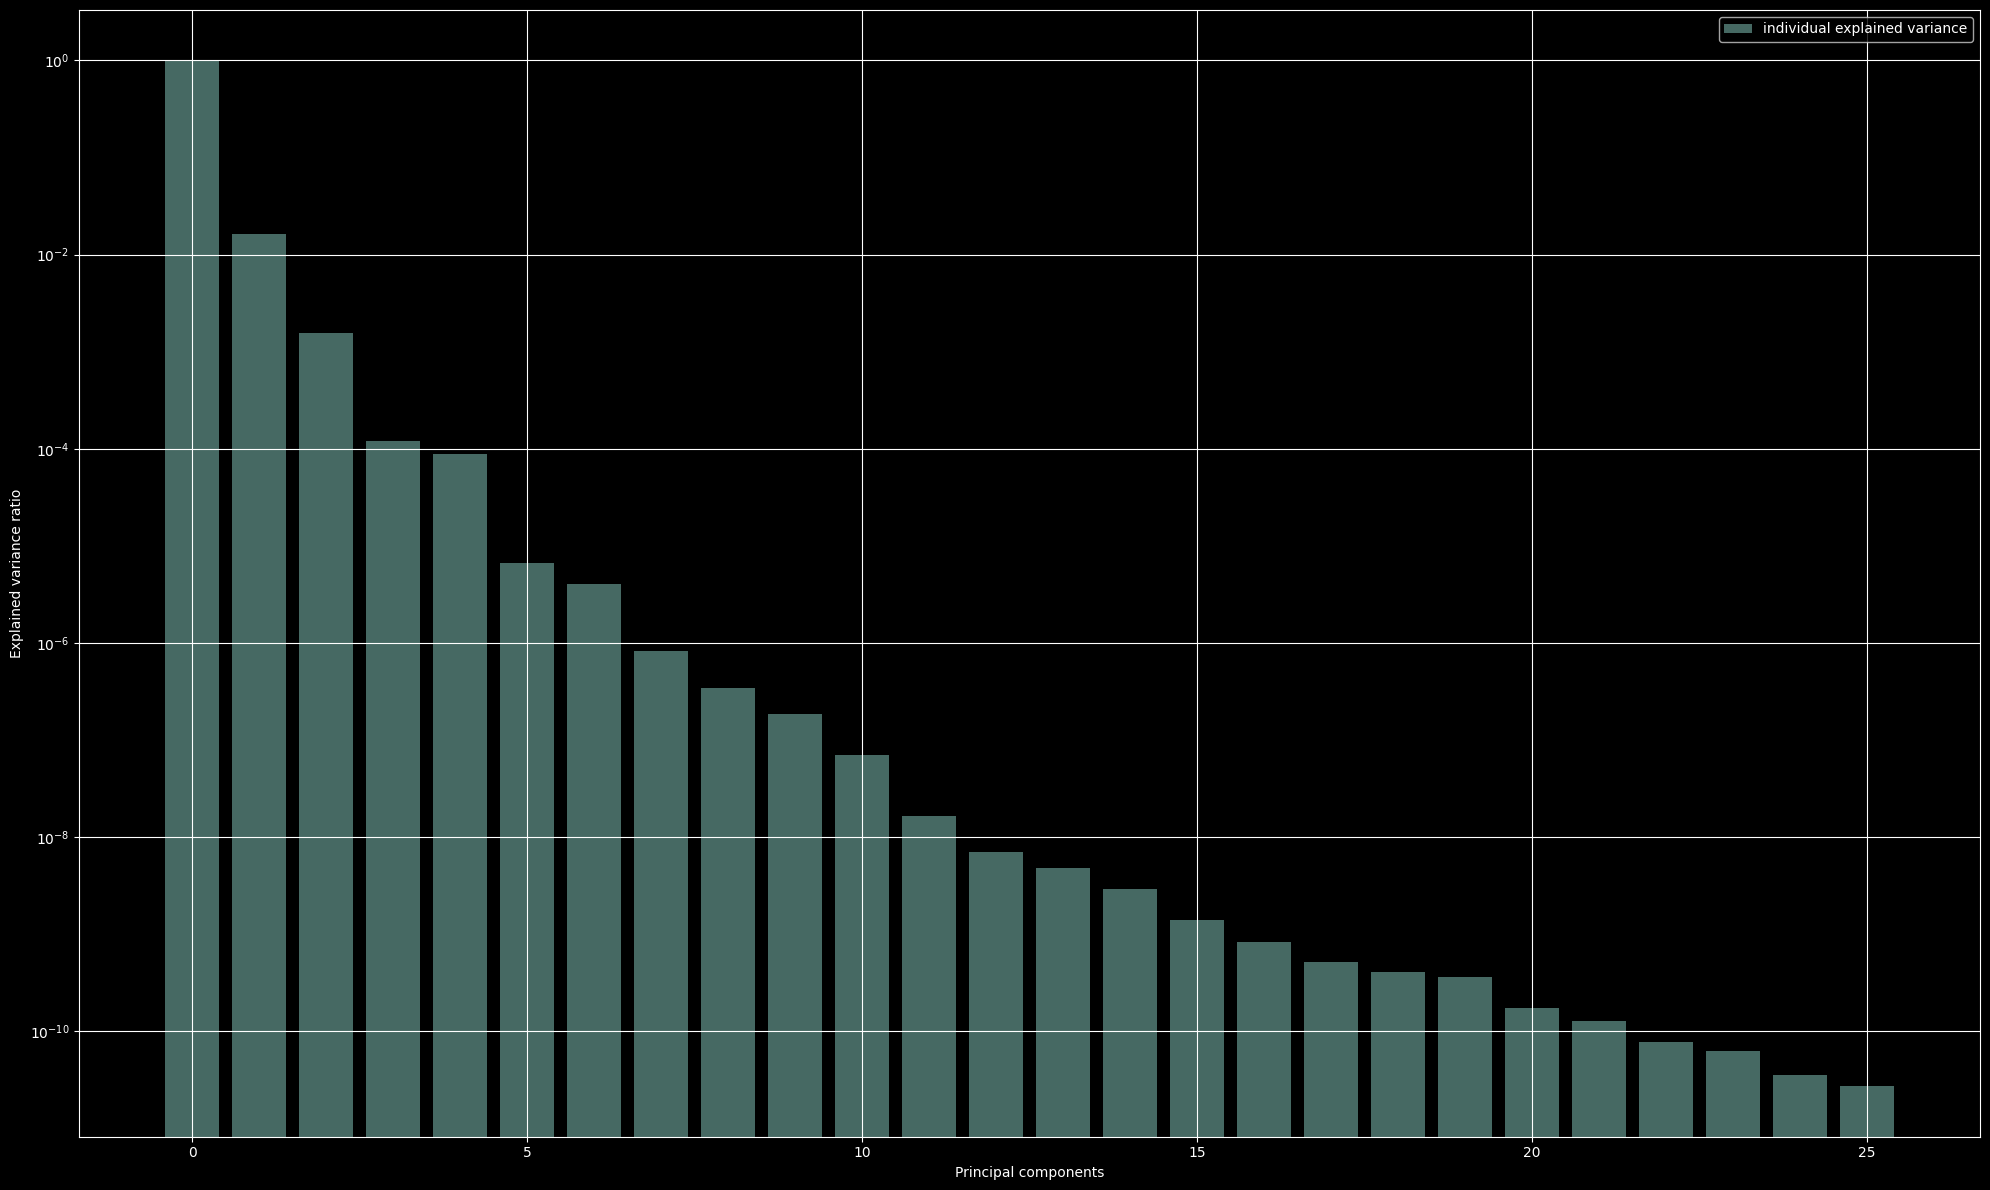

In [24]:
# We used logarithmic scale in the y-axis becaus the first value is so high

with plt.style.context('dark_background'):
    fig=plt.figure(figsize=(20, 12))
    ax = fig.add_subplot()

    ax.bar(range(26), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    ax.set_yscale('log')
    
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.grid(visible=True)
    plt.tight_layout()

In [25]:
X=X_new
(X.shape, Y.shape)

((569, 26), (569,))

## Convert to one-hot

In [26]:
#Check befor conversion
print("Converting to categorical")
print("Before Conversion:")
print(Y.shape)
print(type(Y))


#Convert to Categorical values
Y = Y.map({'B':0,'M':1})
Y = utils.to_categorical(Y, num_classes=2)


#verify shape
print("After Conversion:")
print(Y.shape)
type(Y)

Converting to categorical
Before Conversion:
(569,)
<class 'pandas.core.series.Series'>
After Conversion:
(569, 2)


numpy.ndarray

## Splitting data into training and testing

In [27]:
(X.shape, Y.shape)

((569, 26), (569, 2))

In [28]:
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.15,stratify=Y)

In [29]:
y_test.shape

(86, 2)

## Scaling

In [30]:
scaler=StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(X_train.shape, X_test)

((483, 26),
 array([[ 0.31024525, -0.4282029 ,  0.50932861, ...,  0.69132329,
          0.38708371,  1.3022819 ],
        [-0.63505668,  0.1801638 , -0.19118375, ...,  0.1769355 ,
         -1.62760981, -1.17082442],
        [-1.3386967 , -0.92348225,  0.8417024 , ..., -0.78131284,
         -0.86026557, -0.32302263],
        ...,
        [-0.89958412, -0.33013706,  0.20794978, ..., -0.67578664,
         -0.40632143, -0.97081209],
        [ 0.68138615,  0.47973629,  0.18338473, ..., -0.30469644,
          0.380429  , -0.10229071],
        [-0.65262028, -0.34002837,  0.46398131, ...,  1.22059906,
          1.47123083,  0.14443588]]))

## Reshaping

In [31]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((483, 26), (86, 26), (483, 2), (86, 2))

In [32]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [33]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((483, 26, 1), (86, 26, 1), (483, 2), (86, 2))

In [34]:
X_train.shape[1]

26

# Create the Float32 model 

In [35]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Input


In [36]:
# Define the teacher model
teacher = keras.Sequential([
    keras.Input(shape=(X_train.shape[1], 1)),

    keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Conv1D(filters=448, kernel_size=2, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(2, activation='sigmoid')  # Note: Only use sigmoid if you're using one-hot encoding for y_train
])

In [37]:
print(type(teacher.layers[0]))

<class 'keras.src.layers.convolutional.conv1d.Conv1D'>


In [38]:
# Compile the model
teacher.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',  # use categorical_crossentropy if y is one-hot encoded
    metrics=['accuracy']
)

In [39]:
# Train the model
start_time = time.time()

teacher_history = teacher.fit(
    X_train, y_train,
    epochs=epoch,
    validation_data=(X_test, y_test),
    verbose=1
)

end_time = time.time()
print(f"Training Time: {end_time - start_time:.2f} seconds")

Epoch 1/50
16/16 [==============================] - 3s 39ms/step - loss: 0.6795 - accuracy: 0.7329 - val_loss: 0.6689 - val_accuracy: 0.8140
Epoch 2/50
16/16 [==============================] - 0s 18ms/step - loss: 0.3331 - accuracy: 0.8675 - val_loss: 0.6326 - val_accuracy: 0.8372
Epoch 3/50
16/16 [==============================] - 0s 18ms/step - loss: 0.2138 - accuracy: 0.9379 - val_loss: 0.6036 - val_accuracy: 0.8256
Epoch 4/50
16/16 [==============================] - 0s 18ms/step - loss: 0.1738 - accuracy: 0.9420 - val_loss: 0.5734 - val_accuracy: 0.8023
Epoch 5/50
16/16 [==============================] - 0s 21ms/step - loss: 0.1493 - accuracy: 0.9586 - val_loss: 0.5464 - val_accuracy: 0.7674
Epoch 6/50
16/16 [==============================] - 0s 19ms/step - loss: 0.1460 - accuracy: 0.9586 - val_loss: 0.5227 - val_accuracy: 0.7558
Epoch 7/50
16/16 [==============================] - 0s 17ms/step - loss: 0.0911 - accuracy: 0.9834 - val_loss: 0.4963 - val_accuracy: 0.7674
Epoch 8/50
16

In [40]:
loss, acc = teacher.evaluate(X_test, y_test)
baseline_acc=acc
print(f"Based Model Accuracy: {baseline_acc:.4f}")

3/3 [==============================] - 0s 5ms/step - loss: 0.2666 - accuracy: 0.9535
Based Model Accuracy: 0.9535


In [41]:
teacher.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 25, 64)            192       
                                                                 
 batch_normalization (Batch  (None, 25, 64)            256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 25, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 24, 448)           57792     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 448)           1792      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 24, 448)           0

In [42]:
teacher.save('teacher.keras')  # New recommended format

In [43]:
teacher.export('teacher')  # New recommended format

# Convert to a TFLite model
converter = tf.lite.TFLiteConverter.from_saved_model("teacher")
my_teacher_model = converter.convert()

with open("teacher.tflite", "wb") as f:
    f.write(my_teacher_model)

Saved artifact at 'teacher'. The following endpoints are available:

* Endpoint 'serve'
  Args:
    args_0: float32 Tensor, shape=(None, 26, 1)
  Returns:
    float32 Tensor, shape=(None, 2)


In [44]:
# Get predicted probabilities from the model
y_pred_probs = teacher.predict(X_test)

# Convert sigmoid outputs to class labels by picking the class with highest probability
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert one-hot true labels to class indices
y_true = np.argmax(y_test, axis=1)

3/3 [==============================] - 0s 4ms/step


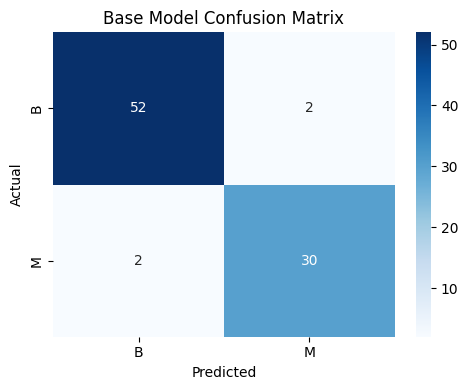

In [45]:
def plot_confusion_matrix(y_true, y_pred, class_names, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Define your class labels
class_names = ['B', 'M']

# Plot
plot_confusion_matrix(y_true, y_pred, class_names, "Base Model Confusion Matrix")

# Apply  QAT to the pretrained model

In [46]:
 #Create the Custom Conv1D QuantizeConfig
import tensorflow_model_optimization as tfmot
from tensorflow_model_optimization.python.core.quantization.keras.quantize_config import QuantizeConfig
from tensorflow_model_optimization.python.core.quantization.keras.default_8bit import default_8bit_quantize_configs

class Conv1DQuantizeConfig(QuantizeConfig):
    def get_weights_and_quantizers(self, layer):
        return [(layer.kernel, tfmot.quantization.keras.quantizers.LastValueQuantizer(
            num_bits=8, symmetric=True, narrow_range=False, per_axis=False))]

    def get_activations_and_quantizers(self, layer):
        return [(layer.activation, tfmot.quantization.keras.quantizers.MovingAverageQuantizer(
            num_bits=8, symmetric=False, narrow_range=False, per_axis=False))]

    def set_quantize_weights(self, layer, quantize_weights):
        layer.kernel = quantize_weights[0]

    def set_quantize_activations(self, layer, quantize_activations):
        layer.activation = quantize_activations[0]

    def get_output_quantizers(self, layer):
        return [tfmot.quantization.keras.quantizers.MovingAverageQuantizer(
            num_bits=8, symmetric=False, narrow_range=False, per_axis=False)]

    def get_config(self):
        return {}


In [47]:
#Manually Annotate the Conv1D Layers With the Custom Config
from tensorflow_model_optimization.quantization.keras import quantize_annotate_layer, quantize_annotate_model, quantize_apply
from tensorflow_model_optimization.quantization.keras import quantize_scope

#  model definition...
input_layer = Input(shape=(X.shape[1], 1))
x = quantize_annotate_layer(layers.Conv1D(64, 2, activation='relu'), quantize_config=Conv1DQuantizeConfig())(input_layer)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.1)(x)

x = quantize_annotate_layer(layers.Conv1D(448, 2, activation='relu'), quantize_config=Conv1DQuantizeConfig())(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)

x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.2)(x)
output = layers.Dense(2, activation='sigmoid')(x)

annotated_model = tf.keras.Model(inputs=input_layer, outputs=output)


In [48]:
# Wrap with scope to register the custom quantization config
with quantize_scope({'Conv1DQuantizeConfig': Conv1DQuantizeConfig}):
    quant_aware_model = quantize_apply(annotated_model)

In [49]:
adam_optimizer = keras.optimizers.Adam(learning_rate=0.0001)

#compile and train
quant_aware_model.compile(optimizer=adam_optimizer,
                          loss='binary_crossentropy',
                          metrics=['accuracy'])

quant_aware_history=quant_aware_model.fit(X_train, y_train, epochs=epoch, validation_data=(X_test, y_test))

Epoch 1/50
16/16 [==============================] - 4s 69ms/step - loss: 0.6280 - accuracy: 0.7453 - val_loss: 0.6715 - val_accuracy: 0.7674
Epoch 2/50
16/16 [==============================] - 0s 21ms/step - loss: 0.3122 - accuracy: 0.8737 - val_loss: 0.6528 - val_accuracy: 0.9302
Epoch 3/50
16/16 [==============================] - 0s 21ms/step - loss: 0.1903 - accuracy: 0.9275 - val_loss: 0.6375 - val_accuracy: 0.9070
Epoch 4/50
16/16 [==============================] - 0s 21ms/step - loss: 0.1708 - accuracy: 0.9462 - val_loss: 0.6159 - val_accuracy: 0.8953
Epoch 5/50
16/16 [==============================] - 0s 21ms/step - loss: 0.1257 - accuracy: 0.9669 - val_loss: 0.5921 - val_accuracy: 0.8953
Epoch 6/50
16/16 [==============================] - 0s 21ms/step - loss: 0.1075 - accuracy: 0.9689 - val_loss: 0.5696 - val_accuracy: 0.9186
Epoch 7/50
16/16 [==============================] - 0s 20ms/step - loss: 0.0955 - accuracy: 0.9689 - val_loss: 0.5565 - val_accuracy: 0.9419
Epoch 8/50
16

In [50]:
loss, acc = quant_aware_model.evaluate(X_test, y_test)
quant_aware_acc=acc
print(f"QAT Model Accuracy: {quant_aware_acc:.4f}")

3/3 [==============================] - 0s 6ms/step - loss: 0.2551 - accuracy: 0.9302
QAT Model Accuracy: 0.9302


In [69]:
quant_aware_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 26, 1)]           0         
                                                                 
 quantize_layer (QuantizeLa  (None, 26, 1)             3         
 yer)                                                            
                                                                 
 quant_conv1d_2 (QuantizeWr  (None, 25, 64)            199       
 apperV2)                                                        
                                                                 
 batch_normalization_2 (Bat  (None, 25, 64)            256       
 chNormalization)                                                
                                                                 
 quant_dropout_3 (QuantizeW  (None, 25, 64)            1         
 rapperV2)                                                   

In [51]:
def plot_confusion_matrix(y_true, y_pred, class_names=None, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [52]:
y_pred_qat_probs = quant_aware_model.predict(X_test)
y_pred_qat = np.argmax(y_pred_qat_probs, axis=1)

3/3 [==============================] - 0s 5ms/step


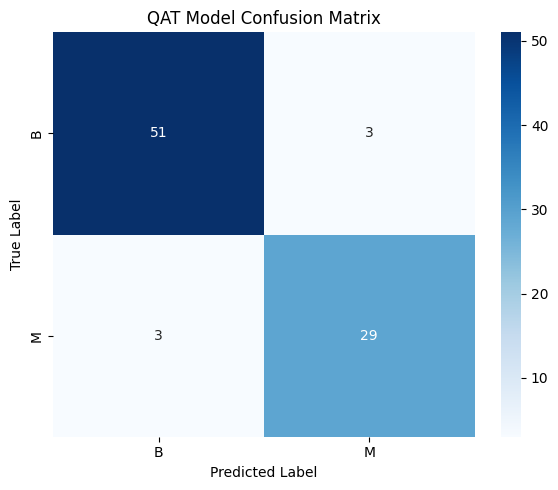

In [53]:
plot_confusion_matrix(y_true, y_pred_qat, class_names, "QAT Model Confusion Matrix")

In [54]:
quant_aware_model.save('qat_model.keras')  # New recommended format

In [55]:
# Step 1: Create TFLiteConverter from trained QAT model
converter = tf.lite.TFLiteConverter.from_keras_model(quant_aware_model)

# Step 2: Enable optimizations
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Step 3: Set representative dataset for calibration (required for full INT8)
def representative_data_gen():
    # for i in range(100):
    #     sample = X_train[i].reshape(1, X_train.shape[1], 1).astype("float32")
    #     yield [sample]
    # Below is an improved version of the code above. It chooses 100 in batches rather than serially. 
    for input_value in tf.data.Dataset.from_tensor_slices(X_train).batch(1).take(100):
        # input_value in FLOAT64, so we convert it to FLOAT32
        input_data = np.array(input_value, dtype=np.float32)
        yield [input_data]

converter.representative_dataset = representative_data_gen

# Step 4: Specify full integer (INT8) quantization for weights & activations
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8   # ✅ use int8, not uint8 for QAT models
converter.inference_output_type = tf.int8  # ✅ use int8, not uint8 for QAT models

# Step 5: Convert the model
tflite_quant_model = converter.convert()

# Step 6: Save the quantized model
with open("teacher_quantized.tflite", "wb") as f:
    f.write(tflite_quant_model)


/usr/local/lib/python3.11/dist-packages/tensorflow/lite/python/convert.py:887: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
fully_quantize: 0, inference_type: 6, input_inference_type: INT8, output_inference_type: INT8


In [56]:
interpreter = tf.lite.Interpreter(model_path="teacher_quantized.tflite")
input_type = interpreter.get_input_details()[0]['dtype']
output_type = interpreter.get_output_details()[0]['dtype']
print("Input type:", input_type)
print("Output type:", output_type)

Input type: <class 'numpy.int8'>
Output type: <class 'numpy.int8'>


In [57]:
import os

baseline_size = os.path.getsize("teacher.keras") / 1024
baseline_tflite_size = os.path.getsize("teacher.tflite") / 1024
quant_aware_size = os.path.getsize("qat_model.keras") / 1024
quant_tflite_size = os.path.getsize("teacher_quantized.tflite") / 1024

print(f"Base line model size: {baseline_size:.2f} KB")
print(f"Base line tflite model size: {baseline_tflite_size:.2f} KB")
print(f"Quantized aware size: {quant_aware_size:.2f} KB")
print(f"Original size: {quant_tflite_size:.2f} KB")


Base line model size: 8811.46 KB
Base line tflite model size: 2925.24 KB
Quantized aware size: 9057.71 KB
Original size: 737.69 KB


In [58]:
def evaluate_tflite_model_int8_with_preds(tflite_path, X_test, y_test):
    import numpy as np
    import tensorflow as tf
    from sklearn.metrics import confusion_matrix, classification_report

    interpreter = tf.lite.Interpreter(model_path=tflite_path)
    interpreter.allocate_tensors()

    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    input_index = input_details[0]['index']
    output_index = output_details[0]['index']

    input_scale, input_zero_point = input_details[0]['quantization']

    correct = 0
    y_pred = []
    y_true = []

    for i in range(len(X_test)):
        input_data = np.expand_dims(X_test[i], axis=0)
        input_data = input_data / input_scale + input_zero_point
        input_data = np.round(input_data).astype(np.int8)

        interpreter.set_tensor(input_index, input_data)
        interpreter.invoke()
        output = interpreter.get_tensor(output_index)

        predicted = np.argmax(output[0])
        actual = np.argmax(y_test[i])

        y_pred.append(predicted)
        y_true.append(actual)

        if predicted == actual:
            correct += 1

    accuracy = correct / len(X_test)
    print(f"\n✅ TFLite INT8 model accuracy: {accuracy * 100:.2f}%")
    print("\n📊 Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

    print("\n🧾 Classification Report:")
    print(classification_report(y_true, y_pred))

    return accuracy, y_true, y_pred

In [59]:
qat_accuracy, y_true, y_pred = evaluate_tflite_model_int8_with_preds("teacher_quantized.tflite", X_test, y_test)


✅ TFLite INT8 model accuracy: 94.19%

📊 Confusion Matrix:
[[52  2]
 [ 3 29]]

🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        54
           1       0.94      0.91      0.92        32

    accuracy                           0.94        86
   macro avg       0.94      0.93      0.94        86
weighted avg       0.94      0.94      0.94        86



INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


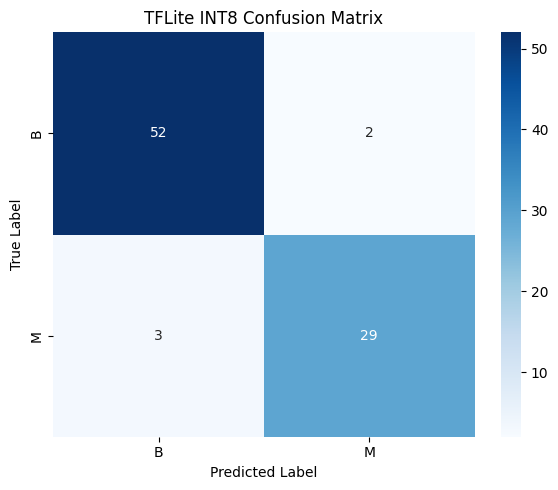

In [60]:
# Replace with your class names if available, or leave as None
class_names = ['B', 'M']  # or however many classes you have

plot_confusion_matrix(y_true, y_pred, class_names=class_names, title="TFLite INT8 Confusion Matrix")

## Accuracy and loss of the Based model

In [61]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='lower right')
  plt.grid(visible=True)
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper right')
  plt.grid(visible=True)
  plt.show()

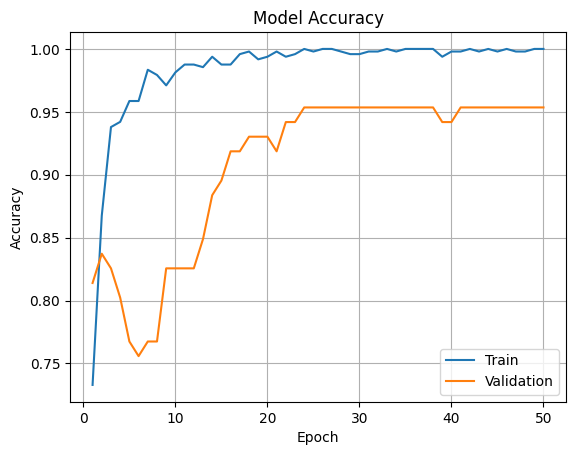

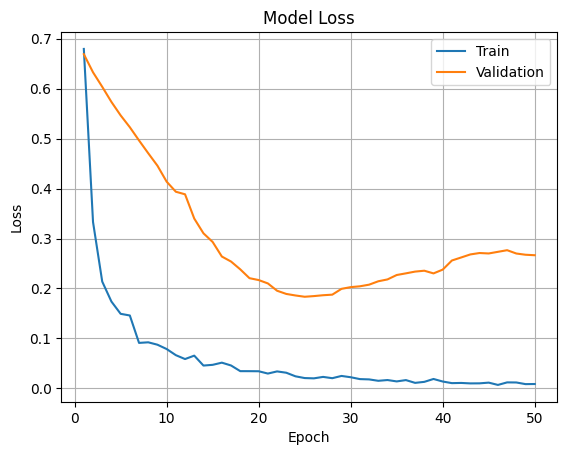

In [62]:
plotLearningCurve(teacher_history,epoch)

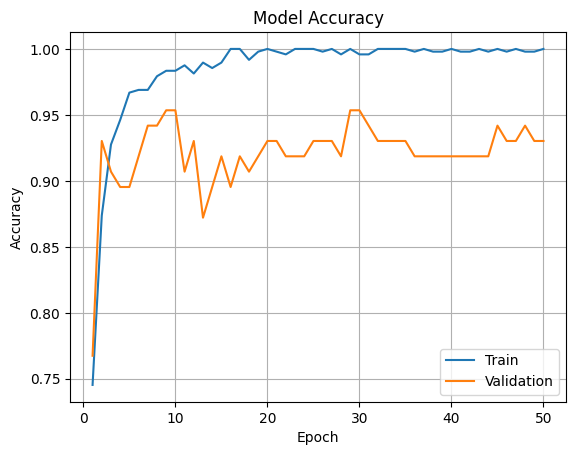

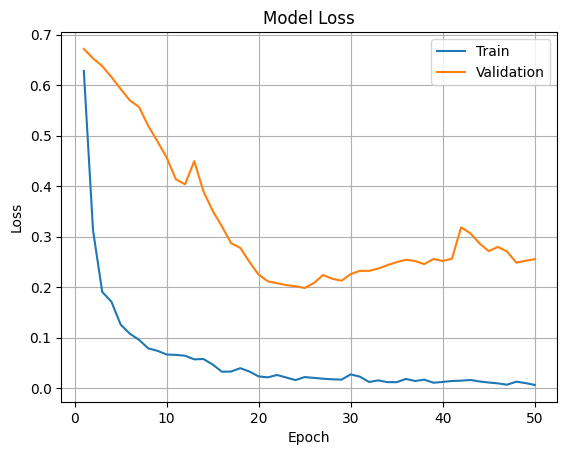

In [63]:
plotLearningCurve(quant_aware_history,epoch)

In [64]:
tot_param=0
for p in (teacher.weights):
    layer_prod=1
    for in_p in p.shape:
        layer_prod = layer_prod*in_p
        
    tot_param = tot_param + layer_prod

print(tot_param)

748354


# Result Summary

In [68]:
print("Factors\t\t\tTM\t\tQAT")
print("="*50)
print("Keras size (kB)\t\t%.2f\t\t%.2f"%(baseline_size,quant_aware_size))
print("tflite size (kB)\t%.2f\t\t%.2f"%(baseline_tflite_size,quant_tflite_size))
print("Accuracy (%%)\t\t%.2f\t\t%.2f"%(baseline_acc*100,quant_aware_acc*100))
print("Total Parameters\t%d\t\t-"%(tot_param))
print("="*50)

Factors			TM		QAT
Keras size (kB)		8811.46		9057.71
tflite size (kB)	2925.24		737.69
Accuracy (%)		95.35		93.02
Total Parameters	748354		-
